In [18]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

In [19]:
df = pd.read_csv("heart_failure_clinical_records_dataset.csv")
df

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


In [20]:
df.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

In [21]:
X = df[['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
        'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time']]

In [22]:
y = df['ejection_fraction']

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.1,random_state=42)

In [24]:
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree Regression': DecisionTreeRegressor(random_state=42),
    'Random Forest Regression': RandomForestRegressor(random_state=42)
}

In [25]:
predictions = {}

for model_name, model in models.items():
    model.fit(X_train, y_train)

    # Step 4: Make predictions
    y_pred = model.predict(X_test)

    # Store predictions for later visualization
    predictions[model_name] = y_pred

    # Step 5: Evaluate the model's performance
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print(f"Model: {model_name}")
    print(f"Mean Squared Error: {mse:.2f}")
    print(f"R-squared: {r2:.2f}")
    print("="*50)

Model: Linear Regression
Mean Squared Error: 104.50
R-squared: 0.08
Model: Decision Tree Regression
Mean Squared Error: 190.97
R-squared: -0.68
Model: Random Forest Regression
Mean Squared Error: 121.05
R-squared: -0.06


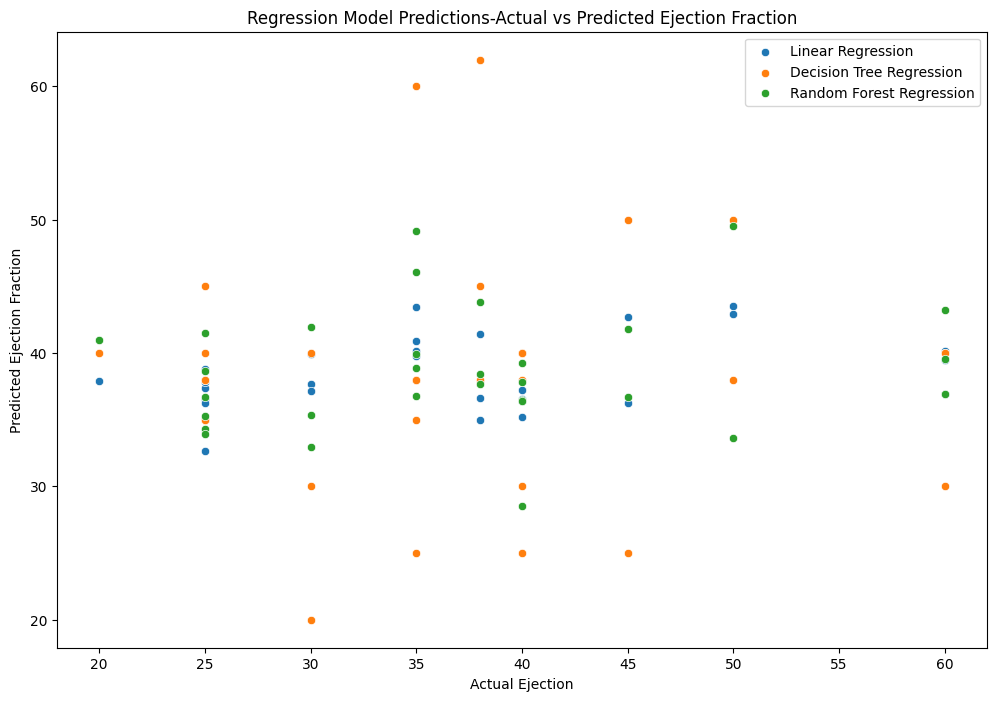

In [26]:
plt.figure(figsize=(12,8))
for model_name, y_pred in predictions.items():
    sns.scatterplot(x=y_test, y=y_pred,label=model_name)

plt.title('Regression Model Predictions-Actual vs Predicted Ejection Fraction')
plt.xlabel('Actual Ejection')
plt.ylabel('Predicted Ejection Fraction')
plt.legend()
plt.show()

##Feature Importance in Regression Task

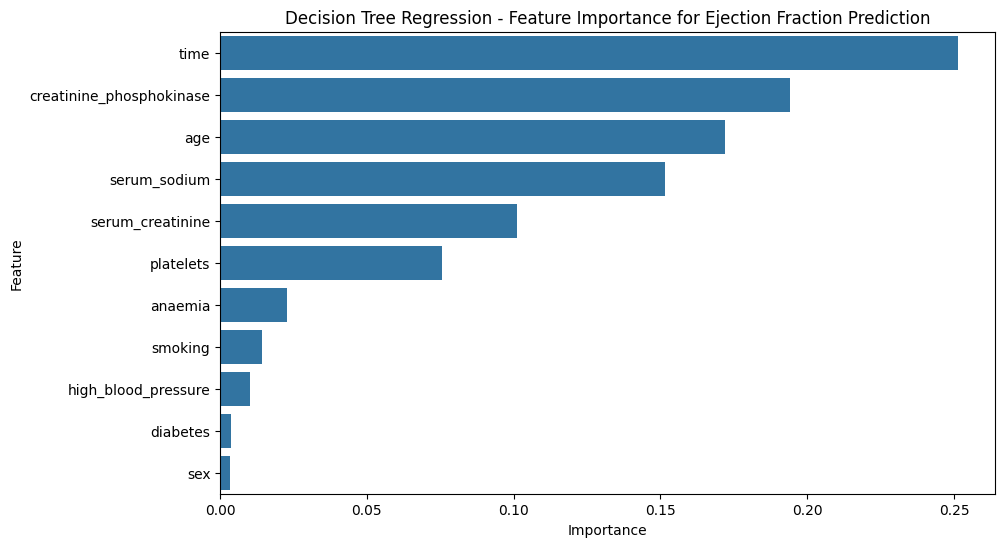

In [27]:
for model_name, model in models.items():
    if 'Tree' in model_name:
        feature_importance = model.feature_importances_
        feature_names = X.columns
        importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance})
        importance_df = importance_df.sort_values(by='Importance', ascending=False)

        plt.figure(figsize=(10, 6))
        sns.barplot(x='Importance', y='Feature', data=importance_df)
        plt.title(f'{model_name} - Feature Importance for Ejection Fraction Prediction')
        plt.show()

In [28]:
linear_model = LinearRegression()
linear_model.fit(X_train,y_train)

LinearRegression()

In [29]:
# Get the coefficients
coefficients = linear_model.coef_

# Display the coefficients along with corresponding feature names
feature_names = X.columns
coefficients_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})
coefficients_df = coefficients_df.sort_values(by='Coefficient', ascending=False)

# Display the coefficients
print("Coefficients for Linear Regression:")
coefficients_df

Coefficients for Linear Regression:


,Feature,Coefficient
1,anaemia,0.628638
7,serum_sodium,0.455505
6,serum_creatinine,0.402843
0,age,0.043120
10,time,0.008482
5,platelets,0.000009
2,creatinine_phosphokinase,-0.000232
4,high_blood_pressure,-0.137528
3,diabetes,-0.166132
9,smoking,-0.607768


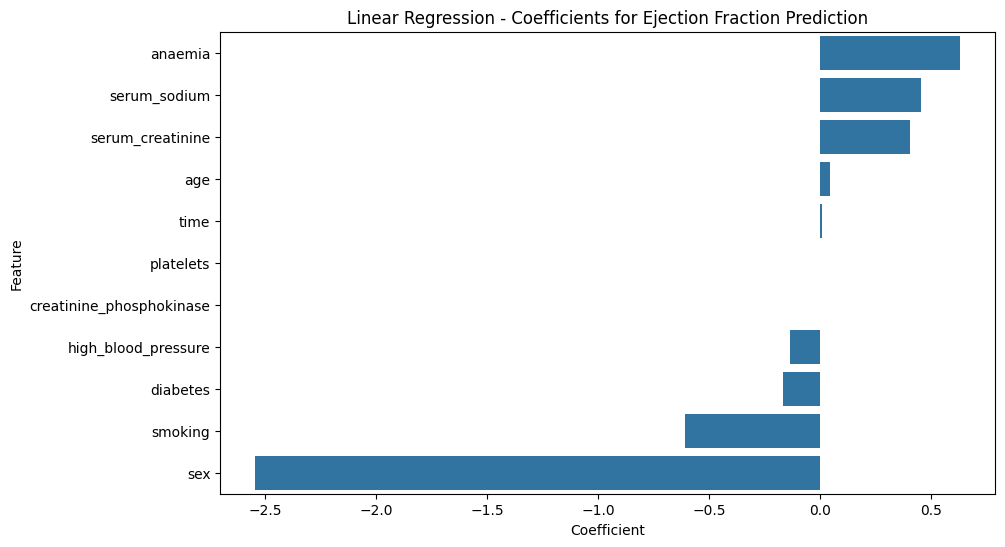

In [30]:
plt.figure(figsize=(10,6))
sns.barplot(x='Coefficient', y='Feature', data=coefficients_df)
plt.title('Linear Regression - Coefficients for Ejection Fraction Prediction')
plt.show()

In [31]:
from sklearn.preprocessing import StandardScaler

In [32]:
scaler = StandardScaler()

In [33]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [34]:
linear_model_scaled = LinearRegression()
linear_model_scaled.fit(X_train_scaled, y_train)

# Get the coefficients
coefficients_scaled = linear_model_scaled.coef_

# Display the coefficients along with corresponding feature names
coefficients_df_scaled = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients_scaled})
coefficients_df_scaled = coefficients_df_scaled.sort_values(by='Coefficient', ascending=False)

# Display the scaled coefficients
print("Scaled Coefficients for Linear Regression:")
coefficients_df_scaled

Scaled Coefficients for Linear Regression:


,Feature,Coefficient
7,serum_sodium,2.012538
5,platelets,0.868689
10,time,0.660073
0,age,0.509143
6,serum_creatinine,0.385239
1,anaemia,0.310998
4,high_blood_pressure,-0.065572
3,diabetes,-0.082188
2,creatinine_phosphokinase,-0.208505
9,smoking,-0.284303


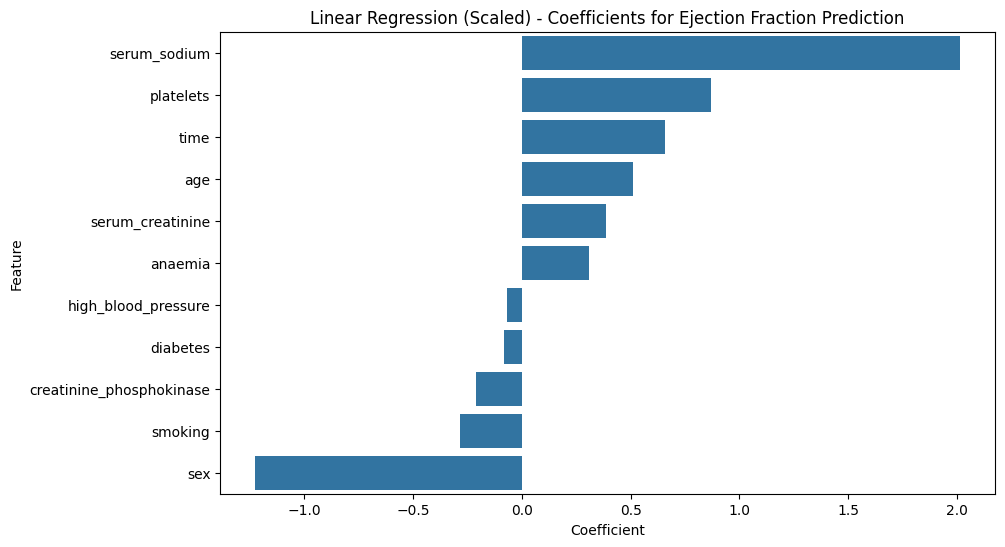

In [35]:
# Visualization of feature importance for Linear Regression (scaled)
plt.figure(figsize=(10, 6))
sns.barplot(x='Coefficient', y='Feature', data=coefficients_df_scaled)
plt.title('Linear Regression (Scaled) - Coefficients for Ejection Fraction Prediction')
plt.show()